# Dataset Exploration

### Date: May 05, 2021
### Shivam Verma 
#### Research scholar, Dept. of Physics, RKMVERI

## Importing basic packages 

In [ ]:
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd
import h5py                      #To read the data file
%matplotlib inline

## Importing data

In [ ]:
!git clone https://github.com/shivamv1/RKM_MLS_proj.git

In [ ]:
ipdir = "MLS2021/Data/JetDataset"
! ls MLS2021/Data/JetDataset/

In [2]:
ip = '%s/Data/JetDataset/jetImage_7_100p_30000_40000.h5' %ipdir 
f = h5py.File(ip)
print(list(f.keys())) #shows the contents of the file

['jetConstituentList', 'jetFeatureNames', 'jetImage', 'jetImageECAL', 'jetImageHCAL', 'jets', 'particleFeatureNames']


In [3]:
featurenames = f.get('jetFeatureNames')
print(featurenames[:])
print('Dataset shape:',featurenames.shape[0])

[b'j_ptfrac' b'j_pt' b'j_eta' b'j_mass' b'j_tau1_b1' b'j_tau2_b1'
 b'j_tau3_b1' b'j_tau1_b2' b'j_tau2_b2' b'j_tau3_b2' b'j_tau32_b1'
 b'j_tau32_b2' b'j_zlogz' b'j_c1_b0' b'j_c1_b1' b'j_c1_b2' b'j_c2_b1'
 b'j_c2_b2' b'j_d2_b1' b'j_d2_b2' b'j_d2_a1_b1' b'j_d2_a1_b2' b'j_m2_b1'
 b'j_m2_b2' b'j_n2_b1' b'j_n2_b2' b'j_tau1_b1_mmdt' b'j_tau2_b1_mmdt'
 b'j_tau3_b1_mmdt' b'j_tau1_b2_mmdt' b'j_tau2_b2_mmdt' b'j_tau3_b2_mmdt'
 b'j_tau32_b1_mmdt' b'j_tau32_b2_mmdt' b'j_c1_b0_mmdt' b'j_c1_b1_mmdt'
 b'j_c1_b2_mmdt' b'j_c2_b1_mmdt' b'j_c2_b2_mmdt' b'j_d2_b1_mmdt'
 b'j_d2_b2_mmdt' b'j_d2_a1_b1_mmdt' b'j_d2_a1_b2_mmdt' b'j_m2_b1_mmdt'
 b'j_m2_b2_mmdt' b'j_n2_b1_mmdt' b'j_n2_b2_mmdt' b'j_mass_trim'
 b'j_mass_mmdt' b'j_mass_prun' b'j_mass_sdb2' b'j_mass_sdm1'
 b'j_multiplicity' b'j_g' b'j_q' b'j_w' b'j_z' b'j_t' b'j_undef']
Dataset shape: 59


In [20]:
jet_data = np.array(f.get('jets'))
targetpre = jet_data[:,-7:-1]
target = jet_data[:,-6:-1]
print("Dataset shape:",target.shape)
print("First five entries:")
for i in range(5):
    print(targetpre[i])

Dataset shape: (10000, 5)
First five entries:
[85.  1.  0.  0.  0.  0.]
[59.  1.  0.  0.  0.  0.]
[94.  0.  0.  0.  0.  1.]
[102.   1.   0.   0.   0.   0.]
[52.  0.  0.  0.  1.  0.]


#### Ignore the first entry (it represents one of the features that was seen above particularly, it represents j_multiplicity i.e. jet multiplicity), The last 5 entries define the type of particle. Let's see what the last 5 entries represents
- [1, 0, 0, 0, 0] for gluons
- [0, 1, 0, 0, 0] for quarks
- [0, 0, 1, 0, 0] for Ws
- [0, 0, 0, 1, 0] for Zs
- [0, 0, 0, 0, 1] for Top


In [21]:
data = np.array(jet_data[:,:-6]) #isolating the entries with jet features
print(data.shape)

(10000, 53)


In [22]:
labelCat= ["gluon", "quark", "W", "Z", "top"]
def makePlot(feature_index, input_data, input_featurenames):
    plt.subplots()
    for i in range(len(labelCat)):
        my_data = input_data[np.argmax(target, axis=1) == i]
        plt.hist(my_data[:,feature_index], 50, density=True, histtype='step', fill=False, linewidth=1.5)
    plt.yscale('log')    
    plt.legend(labelCat, fontsize=12, frameon=False)  
    plt.xlabel(str(input_featurenames[feature_index], "utf-8"), fontsize=15)
    plt.ylabel('Probab. Density', fontsize=15)
    plt.show()

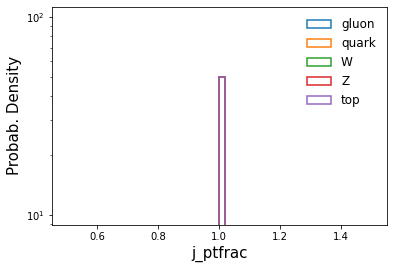

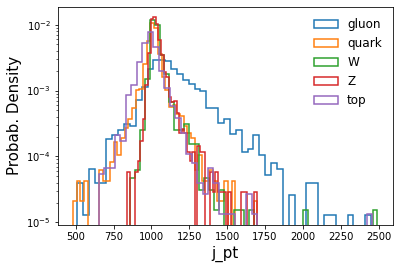

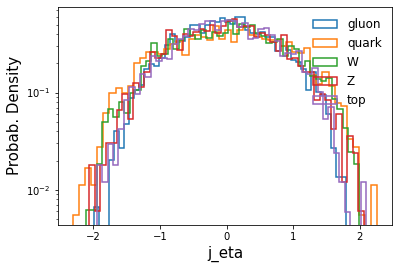

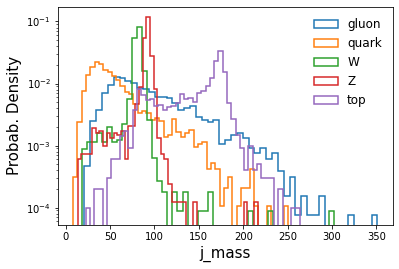

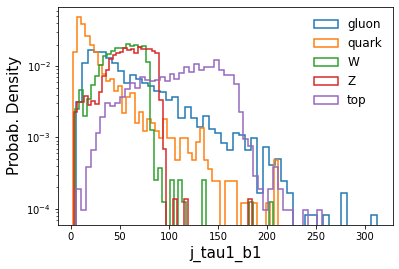

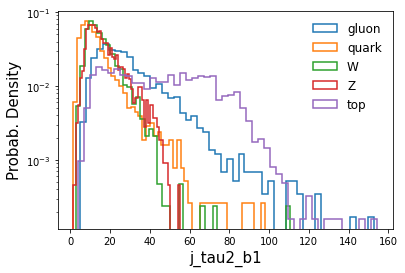

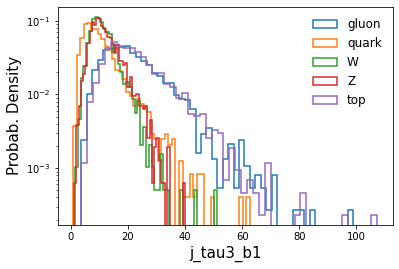

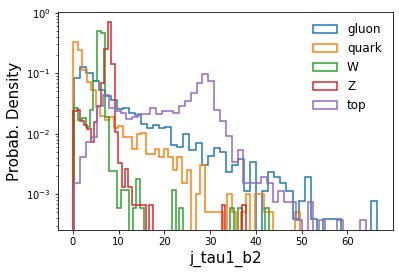

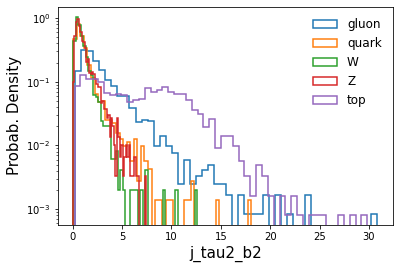

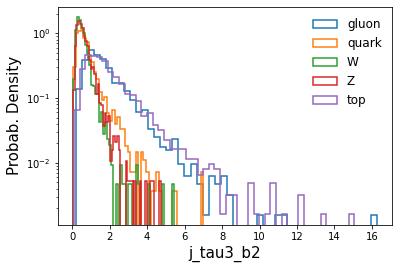

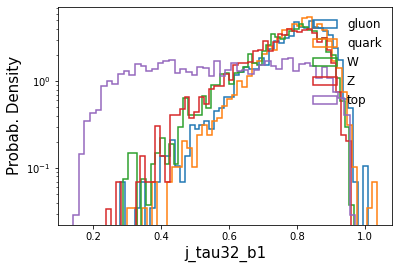

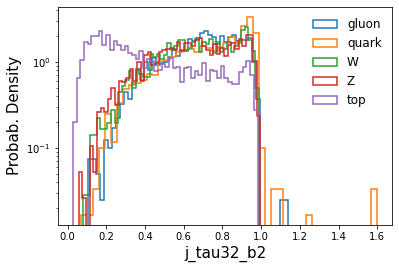

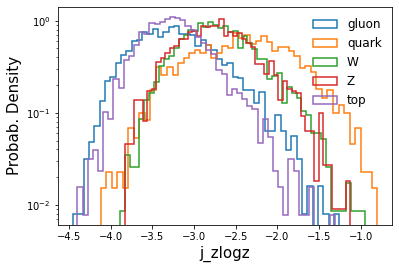

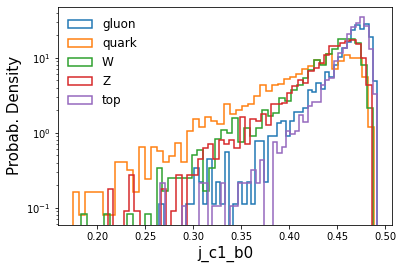

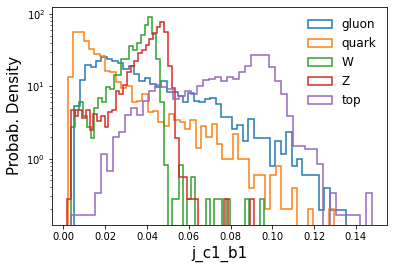

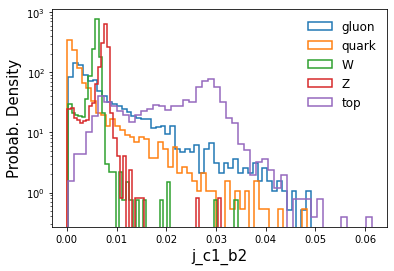

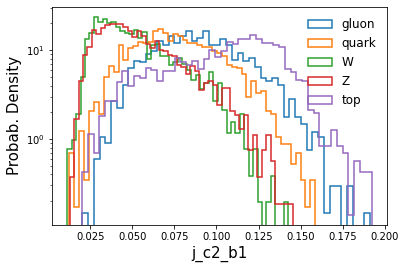

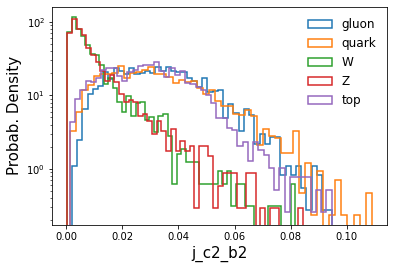

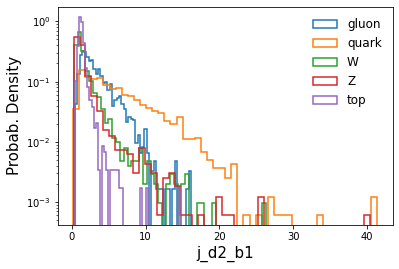

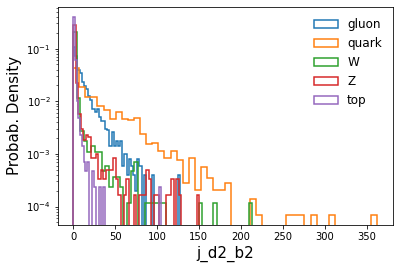

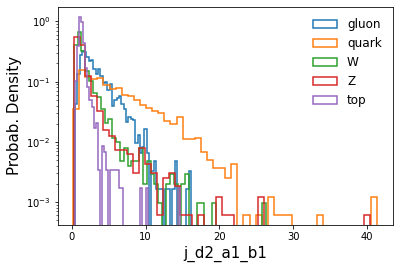

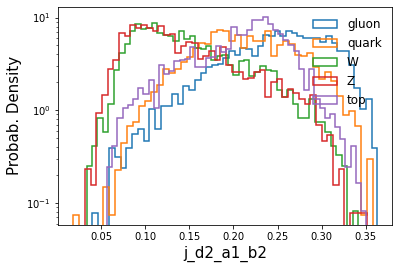

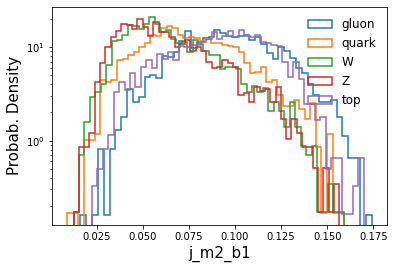

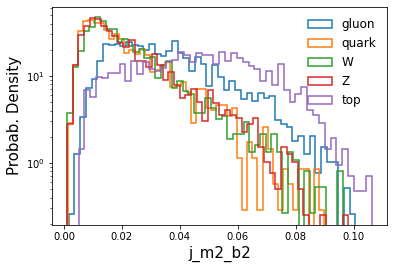

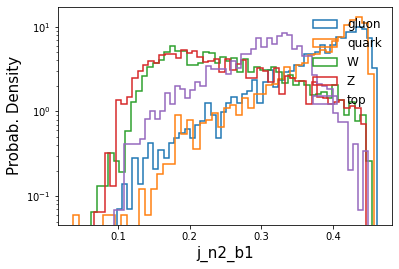

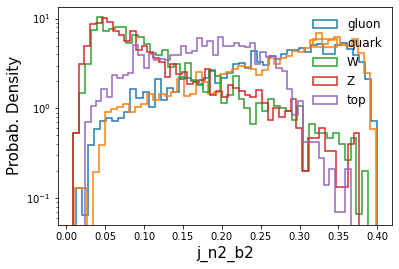

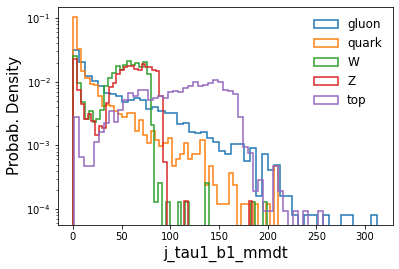

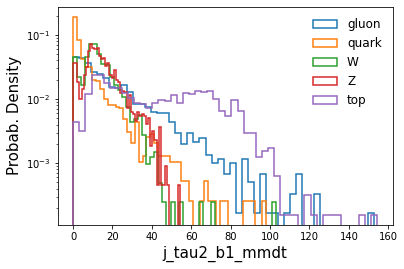

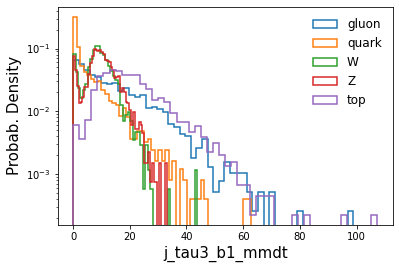

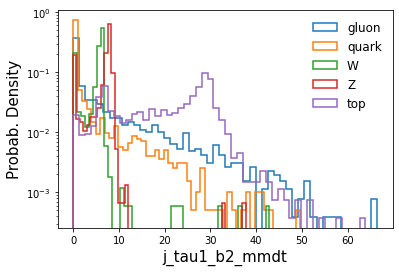

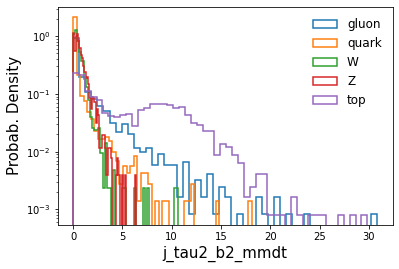

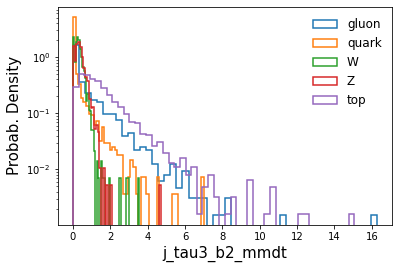

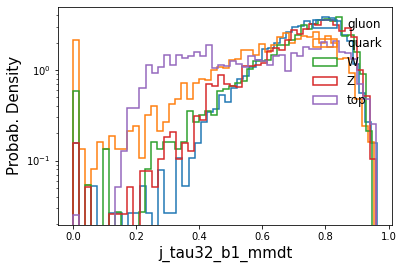

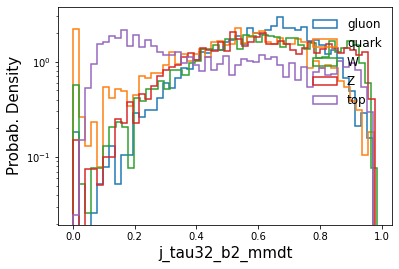

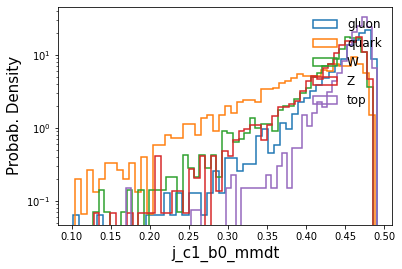

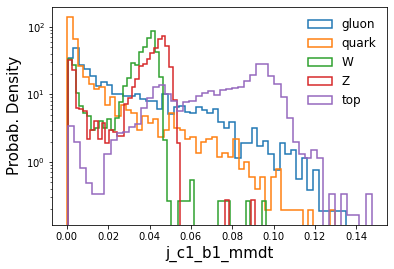

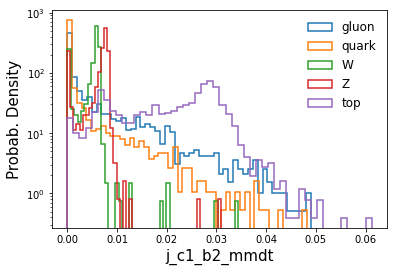

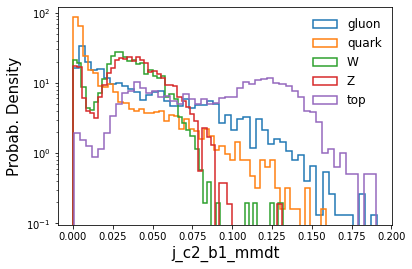

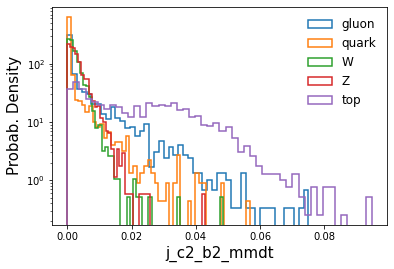

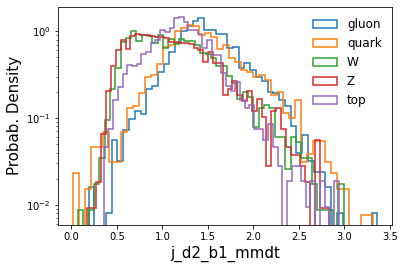

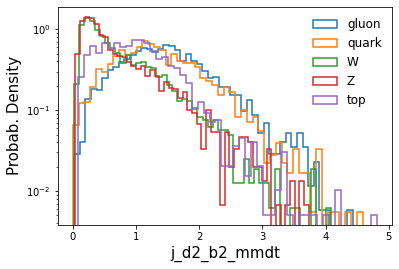

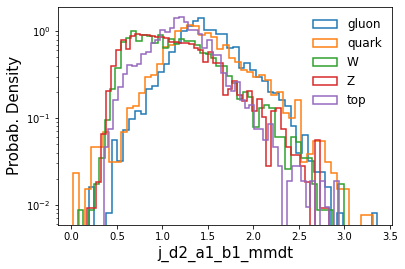

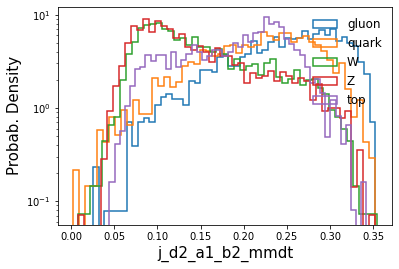

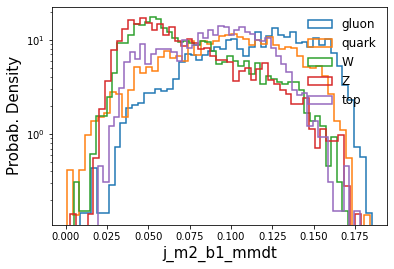

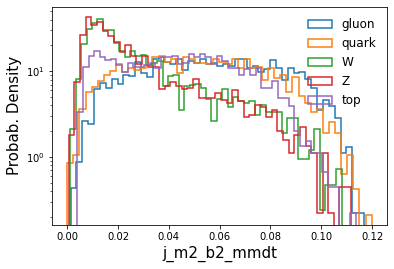

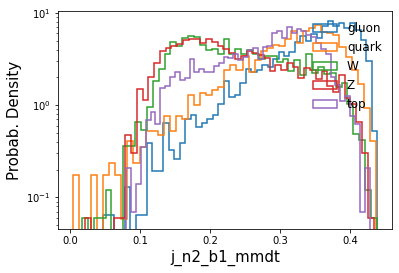

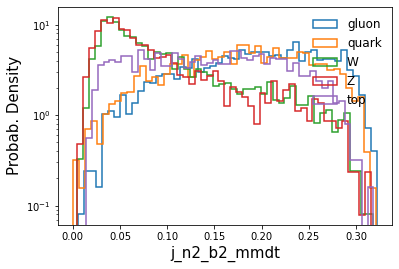

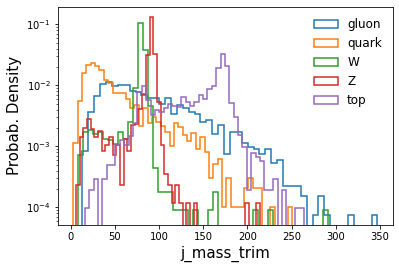

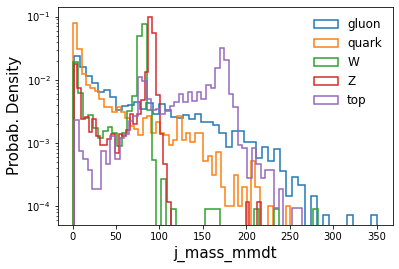

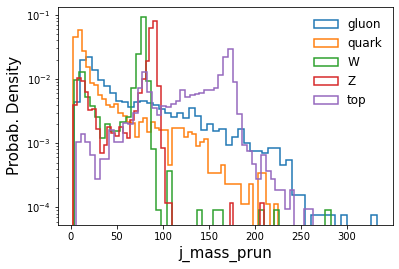

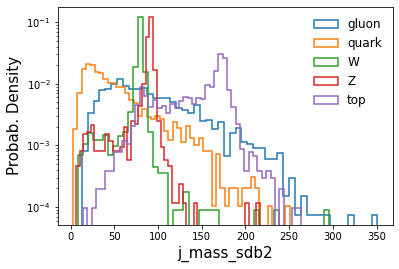

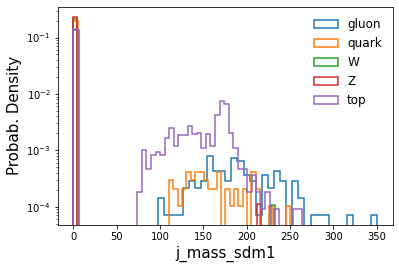

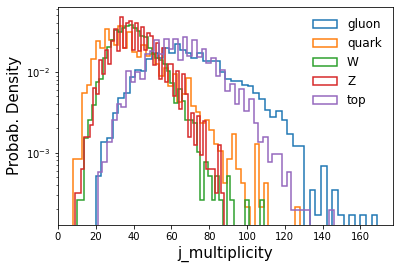

In [23]:
for i in range(len(featurenames[:-6])):
    makePlot(i, data, featurenames)

# Image dataset

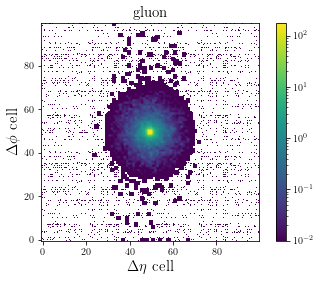

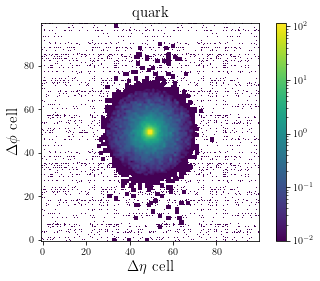

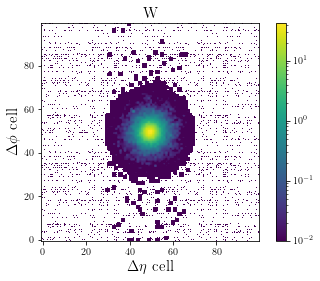

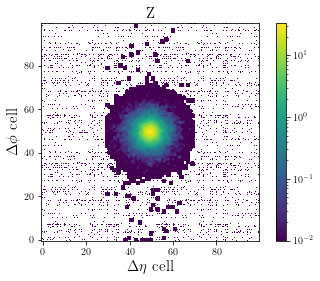

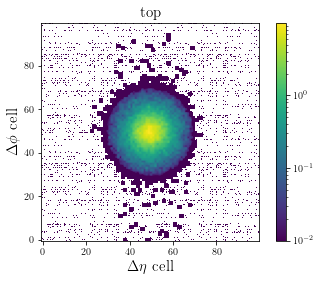

In [24]:
from matplotlib.colors import LogNorm
labelCat= ["gluon", "quark", "W", "Z", "top"]
image = np.array(f.get('jetImage'))
image_g = image[np.argmax(target, axis=1) == 0]
image_q = image[np.argmax(target, axis=1) == 1]
image_W = image[np.argmax(target, axis=1) == 2]
image_Z = image[np.argmax(target, axis=1) == 3]
image_t = image[np.argmax(target, axis=1) == 4]
images = [image_q, image_g, image_W, image_Z, image_t]
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
for i in range(len(images)):
    SUM_Image = np.sum(images[i], axis = 0)
    plt.imshow(SUM_Image/float(images[i].shape[0]), origin='lower',norm=LogNorm(vmin=0.01))
    plt.colorbar()
    plt.title(labelCat[i], fontsize=15)
    plt.xlabel("$\Delta\eta$ cell", fontsize=15)
    plt.ylabel("$\Delta\phi$ cell", fontsize=15)
    plt.show()

# The particle-list dataset

In [39]:
p_featurenames = f.get("particleFeatureNames")
print(p_featurenames[:])

[b'j1_px' b'j1_py' b'j1_pz' b'j1_e' b'j1_erel' b'j1_pt' b'j1_ptrel'
 b'j1_eta' b'j1_etarel' b'j1_etarot' b'j1_phi' b'j1_phirel' b'j1_phirot'
 b'j1_deltaR' b'j1_costheta' b'j1_costhetarel' b'j1_pdgid']


In [40]:
p_data = f.get("jetConstituentList")
print(p_data.shape)

(10000, 100, 16)


In [64]:
labelCat= ["gluon", "quark", "W", "Z", "top"]
def makePlot_p(feature_index, input_data, input_featurenames):
    plt.subplots()
    for i in range(len(labelCat)):
        my_data = input_data[:,:,feature_index]
        my_data = my_data[np.argmax(target, axis=1) == i]
        plt.hist(my_data[:,feature_index].flatten(), 50, density=True, histtype='step', fill=False, linewidth=1.5)
    plt.yscale('log')    
    plt.legend(labelCat, fontsize=12, frameon=False)  
    plt.xlabel(str(input_featurenames[feature_index], 'utf-8'), fontsize=15)
    plt.ylabel('Probab. Density', fontsize=15)
    plt.show()

In [65]:
for i in range(len(p_featurenames)-1):
    makePlot_p(i, p_data, p_featurenames)

RuntimeError: latex was not able to process the following string:
b'j1_px'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.22 (MiKTeX 21.3)
entering extended mode
(/home/shivam/.cache/matplotlib/tex.cache/89363497228d142d6c55cd23b1a280a7.tex
LaTeX2e <2020-10-01> patch level 4
L3 programming layer <2021-02-18>
(/home/shivam/.miktex/texmfs/install/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/home/shivam/.miktex/texmfs/install/tex/latex/base/size10.clo))
(/home/shivam/.miktex/texmfs/install/tex/latex/type1cm/type1cm.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/cm-super/type1ec.sty
(/home/shivam/.miktex/texmfs/install/tex/latex/base/t1cmr.fd))
(/home/shivam/.miktex/texmfs/install/tex/latex/base/inputenc.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/geometry/geometry.sty
(/home/shivam/.miktex/texmfs/install/tex/latex/graphics/keyval.sty)
(/home/shivam/.miktex/texmfs/install/tex/generic/iftex/ifvtex.sty
(/home/shivam/.miktex/texmfs/install/tex/generic/iftex/iftex.sty))
(/home/shivam/.miktex/texmfs/install/tex/latex/geometry/geometry.cfg))
(/home/shivam/.miktex/texmfs/install/tex/latex/base/textcomp.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/l3backend/l3backend-dvips.def)
No file 89363497228d142d6c55cd23b1a280a7.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily j1_
                   px}
No pages of output.
Transcript written on 89363497228d142d6c55cd23b1a280a7.log.




<Figure size 432x288 with 1 Axes>

RuntimeError: latex was not able to process the following string:
b'j1_py'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.22 (MiKTeX 21.3)
entering extended mode
(/home/shivam/.cache/matplotlib/tex.cache/8baaed944df2efe928fc664eec61bb5c.tex
LaTeX2e <2020-10-01> patch level 4
L3 programming layer <2021-02-18>
(/home/shivam/.miktex/texmfs/install/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/home/shivam/.miktex/texmfs/install/tex/latex/base/size10.clo))
(/home/shivam/.miktex/texmfs/install/tex/latex/type1cm/type1cm.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/cm-super/type1ec.sty
(/home/shivam/.miktex/texmfs/install/tex/latex/base/t1cmr.fd))
(/home/shivam/.miktex/texmfs/install/tex/latex/base/inputenc.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/geometry/geometry.sty
(/home/shivam/.miktex/texmfs/install/tex/latex/graphics/keyval.sty)
(/home/shivam/.miktex/texmfs/install/tex/generic/iftex/ifvtex.sty
(/home/shivam/.miktex/texmfs/install/tex/generic/iftex/iftex.sty))
(/home/shivam/.miktex/texmfs/install/tex/latex/geometry/geometry.cfg))
(/home/shivam/.miktex/texmfs/install/tex/latex/base/textcomp.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/l3backend/l3backend-dvips.def)
No file 8baaed944df2efe928fc664eec61bb5c.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily j1_
                   py}
No pages of output.
Transcript written on 8baaed944df2efe928fc664eec61bb5c.log.




<Figure size 432x288 with 1 Axes>

RuntimeError: latex was not able to process the following string:
b'j1_pz'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.22 (MiKTeX 21.3)
entering extended mode
(/home/shivam/.cache/matplotlib/tex.cache/a9cfb9a8170af0515b85164f6b2891c0.tex
LaTeX2e <2020-10-01> patch level 4
L3 programming layer <2021-02-18>
(/home/shivam/.miktex/texmfs/install/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/home/shivam/.miktex/texmfs/install/tex/latex/base/size10.clo))
(/home/shivam/.miktex/texmfs/install/tex/latex/type1cm/type1cm.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/cm-super/type1ec.sty
(/home/shivam/.miktex/texmfs/install/tex/latex/base/t1cmr.fd))
(/home/shivam/.miktex/texmfs/install/tex/latex/base/inputenc.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/geometry/geometry.sty
(/home/shivam/.miktex/texmfs/install/tex/latex/graphics/keyval.sty)
(/home/shivam/.miktex/texmfs/install/tex/generic/iftex/ifvtex.sty
(/home/shivam/.miktex/texmfs/install/tex/generic/iftex/iftex.sty))
(/home/shivam/.miktex/texmfs/install/tex/latex/geometry/geometry.cfg))
(/home/shivam/.miktex/texmfs/install/tex/latex/base/textcomp.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/l3backend/l3backend-dvips.def)
No file a9cfb9a8170af0515b85164f6b2891c0.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily j1_
                   pz}
No pages of output.
Transcript written on a9cfb9a8170af0515b85164f6b2891c0.log.




<Figure size 432x288 with 1 Axes>

RuntimeError: latex was not able to process the following string:
b'j1_e'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.22 (MiKTeX 21.3)
entering extended mode
(/home/shivam/.cache/matplotlib/tex.cache/86fcd93853ca46846d4f43aa04bb1c65.tex
LaTeX2e <2020-10-01> patch level 4
L3 programming layer <2021-02-18>
(/home/shivam/.miktex/texmfs/install/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/home/shivam/.miktex/texmfs/install/tex/latex/base/size10.clo))
(/home/shivam/.miktex/texmfs/install/tex/latex/type1cm/type1cm.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/cm-super/type1ec.sty
(/home/shivam/.miktex/texmfs/install/tex/latex/base/t1cmr.fd))
(/home/shivam/.miktex/texmfs/install/tex/latex/base/inputenc.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/geometry/geometry.sty
(/home/shivam/.miktex/texmfs/install/tex/latex/graphics/keyval.sty)
(/home/shivam/.miktex/texmfs/install/tex/generic/iftex/ifvtex.sty
(/home/shivam/.miktex/texmfs/install/tex/generic/iftex/iftex.sty))
(/home/shivam/.miktex/texmfs/install/tex/latex/geometry/geometry.cfg))
(/home/shivam/.miktex/texmfs/install/tex/latex/base/textcomp.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/l3backend/l3backend-dvips.def)
No file 86fcd93853ca46846d4f43aa04bb1c65.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily j1_
                   e}
No pages of output.
Transcript written on 86fcd93853ca46846d4f43aa04bb1c65.log.




<Figure size 432x288 with 1 Axes>

RuntimeError: latex was not able to process the following string:
b'j1_erel'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.22 (MiKTeX 21.3)
entering extended mode
(/home/shivam/.cache/matplotlib/tex.cache/2360e86008eee77d88004facb9c490c3.tex
LaTeX2e <2020-10-01> patch level 4
L3 programming layer <2021-02-18>
(/home/shivam/.miktex/texmfs/install/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/home/shivam/.miktex/texmfs/install/tex/latex/base/size10.clo))
(/home/shivam/.miktex/texmfs/install/tex/latex/type1cm/type1cm.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/cm-super/type1ec.sty
(/home/shivam/.miktex/texmfs/install/tex/latex/base/t1cmr.fd))
(/home/shivam/.miktex/texmfs/install/tex/latex/base/inputenc.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/geometry/geometry.sty
(/home/shivam/.miktex/texmfs/install/tex/latex/graphics/keyval.sty)
(/home/shivam/.miktex/texmfs/install/tex/generic/iftex/ifvtex.sty
(/home/shivam/.miktex/texmfs/install/tex/generic/iftex/iftex.sty))
(/home/shivam/.miktex/texmfs/install/tex/latex/geometry/geometry.cfg))
(/home/shivam/.miktex/texmfs/install/tex/latex/base/textcomp.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/l3backend/l3backend-dvips.def)
No file 2360e86008eee77d88004facb9c490c3.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily j1_
                   erel}
No pages of output.
Transcript written on 2360e86008eee77d88004facb9c490c3.log.




<Figure size 432x288 with 1 Axes>

RuntimeError: latex was not able to process the following string:
b'j1_pt'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.22 (MiKTeX 21.3)
entering extended mode
(/home/shivam/.cache/matplotlib/tex.cache/6e5b0d303345a3e50229213c0938520d.tex
LaTeX2e <2020-10-01> patch level 4
L3 programming layer <2021-02-18>
(/home/shivam/.miktex/texmfs/install/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/home/shivam/.miktex/texmfs/install/tex/latex/base/size10.clo))
(/home/shivam/.miktex/texmfs/install/tex/latex/type1cm/type1cm.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/cm-super/type1ec.sty
(/home/shivam/.miktex/texmfs/install/tex/latex/base/t1cmr.fd))
(/home/shivam/.miktex/texmfs/install/tex/latex/base/inputenc.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/geometry/geometry.sty
(/home/shivam/.miktex/texmfs/install/tex/latex/graphics/keyval.sty)
(/home/shivam/.miktex/texmfs/install/tex/generic/iftex/ifvtex.sty
(/home/shivam/.miktex/texmfs/install/tex/generic/iftex/iftex.sty))
(/home/shivam/.miktex/texmfs/install/tex/latex/geometry/geometry.cfg))
(/home/shivam/.miktex/texmfs/install/tex/latex/base/textcomp.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/l3backend/l3backend-dvips.def)
No file 6e5b0d303345a3e50229213c0938520d.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily j1_
                   pt}
No pages of output.
Transcript written on 6e5b0d303345a3e50229213c0938520d.log.




<Figure size 432x288 with 1 Axes>

RuntimeError: latex was not able to process the following string:
b'j1_ptrel'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.22 (MiKTeX 21.3)
entering extended mode
(/home/shivam/.cache/matplotlib/tex.cache/e177c31ac389a5533872ab0c15029a19.tex
LaTeX2e <2020-10-01> patch level 4
L3 programming layer <2021-02-18>
(/home/shivam/.miktex/texmfs/install/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/home/shivam/.miktex/texmfs/install/tex/latex/base/size10.clo))
(/home/shivam/.miktex/texmfs/install/tex/latex/type1cm/type1cm.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/cm-super/type1ec.sty
(/home/shivam/.miktex/texmfs/install/tex/latex/base/t1cmr.fd))
(/home/shivam/.miktex/texmfs/install/tex/latex/base/inputenc.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/geometry/geometry.sty
(/home/shivam/.miktex/texmfs/install/tex/latex/graphics/keyval.sty)
(/home/shivam/.miktex/texmfs/install/tex/generic/iftex/ifvtex.sty
(/home/shivam/.miktex/texmfs/install/tex/generic/iftex/iftex.sty))
(/home/shivam/.miktex/texmfs/install/tex/latex/geometry/geometry.cfg))
(/home/shivam/.miktex/texmfs/install/tex/latex/base/textcomp.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/l3backend/l3backend-dvips.def)
No file e177c31ac389a5533872ab0c15029a19.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily j1_
                   ptrel}
No pages of output.
Transcript written on e177c31ac389a5533872ab0c15029a19.log.




<Figure size 432x288 with 1 Axes>

RuntimeError: latex was not able to process the following string:
b'j1_eta'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.22 (MiKTeX 21.3)
entering extended mode
(/home/shivam/.cache/matplotlib/tex.cache/7b060333767fd532e50bb2efd248b25e.tex
LaTeX2e <2020-10-01> patch level 4
L3 programming layer <2021-02-18>
(/home/shivam/.miktex/texmfs/install/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/home/shivam/.miktex/texmfs/install/tex/latex/base/size10.clo))
(/home/shivam/.miktex/texmfs/install/tex/latex/type1cm/type1cm.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/cm-super/type1ec.sty
(/home/shivam/.miktex/texmfs/install/tex/latex/base/t1cmr.fd))
(/home/shivam/.miktex/texmfs/install/tex/latex/base/inputenc.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/geometry/geometry.sty
(/home/shivam/.miktex/texmfs/install/tex/latex/graphics/keyval.sty)
(/home/shivam/.miktex/texmfs/install/tex/generic/iftex/ifvtex.sty
(/home/shivam/.miktex/texmfs/install/tex/generic/iftex/iftex.sty))
(/home/shivam/.miktex/texmfs/install/tex/latex/geometry/geometry.cfg))
(/home/shivam/.miktex/texmfs/install/tex/latex/base/textcomp.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/l3backend/l3backend-dvips.def)
No file 7b060333767fd532e50bb2efd248b25e.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily j1_
                   eta}
No pages of output.
Transcript written on 7b060333767fd532e50bb2efd248b25e.log.




<Figure size 432x288 with 1 Axes>

RuntimeError: latex was not able to process the following string:
b'j1_etarel'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.22 (MiKTeX 21.3)
entering extended mode
(/home/shivam/.cache/matplotlib/tex.cache/c6bca074fe825b467ee417575f80fec3.tex
LaTeX2e <2020-10-01> patch level 4
L3 programming layer <2021-02-18>
(/home/shivam/.miktex/texmfs/install/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/home/shivam/.miktex/texmfs/install/tex/latex/base/size10.clo))
(/home/shivam/.miktex/texmfs/install/tex/latex/type1cm/type1cm.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/cm-super/type1ec.sty
(/home/shivam/.miktex/texmfs/install/tex/latex/base/t1cmr.fd))
(/home/shivam/.miktex/texmfs/install/tex/latex/base/inputenc.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/geometry/geometry.sty
(/home/shivam/.miktex/texmfs/install/tex/latex/graphics/keyval.sty)
(/home/shivam/.miktex/texmfs/install/tex/generic/iftex/ifvtex.sty
(/home/shivam/.miktex/texmfs/install/tex/generic/iftex/iftex.sty))
(/home/shivam/.miktex/texmfs/install/tex/latex/geometry/geometry.cfg))
(/home/shivam/.miktex/texmfs/install/tex/latex/base/textcomp.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/l3backend/l3backend-dvips.def)
No file c6bca074fe825b467ee417575f80fec3.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily j1_
                   etarel}
No pages of output.
Transcript written on c6bca074fe825b467ee417575f80fec3.log.




<Figure size 432x288 with 1 Axes>

RuntimeError: latex was not able to process the following string:
b'j1_etarot'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.22 (MiKTeX 21.3)
entering extended mode
(/home/shivam/.cache/matplotlib/tex.cache/b344ff2da3e6fc4a665fa15489045324.tex
LaTeX2e <2020-10-01> patch level 4
L3 programming layer <2021-02-18>
(/home/shivam/.miktex/texmfs/install/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/home/shivam/.miktex/texmfs/install/tex/latex/base/size10.clo))
(/home/shivam/.miktex/texmfs/install/tex/latex/type1cm/type1cm.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/cm-super/type1ec.sty
(/home/shivam/.miktex/texmfs/install/tex/latex/base/t1cmr.fd))
(/home/shivam/.miktex/texmfs/install/tex/latex/base/inputenc.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/geometry/geometry.sty
(/home/shivam/.miktex/texmfs/install/tex/latex/graphics/keyval.sty)
(/home/shivam/.miktex/texmfs/install/tex/generic/iftex/ifvtex.sty
(/home/shivam/.miktex/texmfs/install/tex/generic/iftex/iftex.sty))
(/home/shivam/.miktex/texmfs/install/tex/latex/geometry/geometry.cfg))
(/home/shivam/.miktex/texmfs/install/tex/latex/base/textcomp.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/l3backend/l3backend-dvips.def)
No file b344ff2da3e6fc4a665fa15489045324.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily j1_
                   etarot}
No pages of output.
Transcript written on b344ff2da3e6fc4a665fa15489045324.log.




<Figure size 432x288 with 1 Axes>

RuntimeError: latex was not able to process the following string:
b'j1_phi'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.22 (MiKTeX 21.3)
entering extended mode
(/home/shivam/.cache/matplotlib/tex.cache/b3174d90b28cc355ceb0fcc0634cb27e.tex
LaTeX2e <2020-10-01> patch level 4
L3 programming layer <2021-02-18>
(/home/shivam/.miktex/texmfs/install/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/home/shivam/.miktex/texmfs/install/tex/latex/base/size10.clo))
(/home/shivam/.miktex/texmfs/install/tex/latex/type1cm/type1cm.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/cm-super/type1ec.sty
(/home/shivam/.miktex/texmfs/install/tex/latex/base/t1cmr.fd))
(/home/shivam/.miktex/texmfs/install/tex/latex/base/inputenc.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/geometry/geometry.sty
(/home/shivam/.miktex/texmfs/install/tex/latex/graphics/keyval.sty)
(/home/shivam/.miktex/texmfs/install/tex/generic/iftex/ifvtex.sty
(/home/shivam/.miktex/texmfs/install/tex/generic/iftex/iftex.sty))
(/home/shivam/.miktex/texmfs/install/tex/latex/geometry/geometry.cfg))
(/home/shivam/.miktex/texmfs/install/tex/latex/base/textcomp.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/l3backend/l3backend-dvips.def)
No file b3174d90b28cc355ceb0fcc0634cb27e.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily j1_
                   phi}
No pages of output.
Transcript written on b3174d90b28cc355ceb0fcc0634cb27e.log.




<Figure size 432x288 with 1 Axes>

RuntimeError: latex was not able to process the following string:
b'j1_phirel'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.22 (MiKTeX 21.3)
entering extended mode
(/home/shivam/.cache/matplotlib/tex.cache/1da0892eb26ccb5e2bccd9d2829a0c6e.tex
LaTeX2e <2020-10-01> patch level 4
L3 programming layer <2021-02-18>
(/home/shivam/.miktex/texmfs/install/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/home/shivam/.miktex/texmfs/install/tex/latex/base/size10.clo))
(/home/shivam/.miktex/texmfs/install/tex/latex/type1cm/type1cm.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/cm-super/type1ec.sty
(/home/shivam/.miktex/texmfs/install/tex/latex/base/t1cmr.fd))
(/home/shivam/.miktex/texmfs/install/tex/latex/base/inputenc.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/geometry/geometry.sty
(/home/shivam/.miktex/texmfs/install/tex/latex/graphics/keyval.sty)
(/home/shivam/.miktex/texmfs/install/tex/generic/iftex/ifvtex.sty
(/home/shivam/.miktex/texmfs/install/tex/generic/iftex/iftex.sty))
(/home/shivam/.miktex/texmfs/install/tex/latex/geometry/geometry.cfg))
(/home/shivam/.miktex/texmfs/install/tex/latex/base/textcomp.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/l3backend/l3backend-dvips.def)
No file 1da0892eb26ccb5e2bccd9d2829a0c6e.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily j1_
                   phirel}
No pages of output.
Transcript written on 1da0892eb26ccb5e2bccd9d2829a0c6e.log.




<Figure size 432x288 with 1 Axes>

RuntimeError: latex was not able to process the following string:
b'j1_phirot'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.22 (MiKTeX 21.3)
entering extended mode
(/home/shivam/.cache/matplotlib/tex.cache/9567e6d97e5f695e11ce9e608e1bffe3.tex
LaTeX2e <2020-10-01> patch level 4
L3 programming layer <2021-02-18>
(/home/shivam/.miktex/texmfs/install/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/home/shivam/.miktex/texmfs/install/tex/latex/base/size10.clo))
(/home/shivam/.miktex/texmfs/install/tex/latex/type1cm/type1cm.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/cm-super/type1ec.sty
(/home/shivam/.miktex/texmfs/install/tex/latex/base/t1cmr.fd))
(/home/shivam/.miktex/texmfs/install/tex/latex/base/inputenc.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/geometry/geometry.sty
(/home/shivam/.miktex/texmfs/install/tex/latex/graphics/keyval.sty)
(/home/shivam/.miktex/texmfs/install/tex/generic/iftex/ifvtex.sty
(/home/shivam/.miktex/texmfs/install/tex/generic/iftex/iftex.sty))
(/home/shivam/.miktex/texmfs/install/tex/latex/geometry/geometry.cfg))
(/home/shivam/.miktex/texmfs/install/tex/latex/base/textcomp.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/l3backend/l3backend-dvips.def)
No file 9567e6d97e5f695e11ce9e608e1bffe3.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily j1_
                   phirot}
No pages of output.
Transcript written on 9567e6d97e5f695e11ce9e608e1bffe3.log.




<Figure size 432x288 with 1 Axes>

RuntimeError: latex was not able to process the following string:
b'j1_deltaR'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.22 (MiKTeX 21.3)
entering extended mode
(/home/shivam/.cache/matplotlib/tex.cache/7e2bf6d3b2f5f188617a886bc479b37c.tex
LaTeX2e <2020-10-01> patch level 4
L3 programming layer <2021-02-18>
(/home/shivam/.miktex/texmfs/install/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/home/shivam/.miktex/texmfs/install/tex/latex/base/size10.clo))
(/home/shivam/.miktex/texmfs/install/tex/latex/type1cm/type1cm.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/cm-super/type1ec.sty
(/home/shivam/.miktex/texmfs/install/tex/latex/base/t1cmr.fd))
(/home/shivam/.miktex/texmfs/install/tex/latex/base/inputenc.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/geometry/geometry.sty
(/home/shivam/.miktex/texmfs/install/tex/latex/graphics/keyval.sty)
(/home/shivam/.miktex/texmfs/install/tex/generic/iftex/ifvtex.sty
(/home/shivam/.miktex/texmfs/install/tex/generic/iftex/iftex.sty))
(/home/shivam/.miktex/texmfs/install/tex/latex/geometry/geometry.cfg))
(/home/shivam/.miktex/texmfs/install/tex/latex/base/textcomp.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/l3backend/l3backend-dvips.def)
No file 7e2bf6d3b2f5f188617a886bc479b37c.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily j1_
                   deltaR}
No pages of output.
Transcript written on 7e2bf6d3b2f5f188617a886bc479b37c.log.




<Figure size 432x288 with 1 Axes>

RuntimeError: latex was not able to process the following string:
b'j1_costheta'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.22 (MiKTeX 21.3)
entering extended mode
(/home/shivam/.cache/matplotlib/tex.cache/ca027492f0a3ea0a2587a9bbeb68a3db.tex
LaTeX2e <2020-10-01> patch level 4
L3 programming layer <2021-02-18>
(/home/shivam/.miktex/texmfs/install/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/home/shivam/.miktex/texmfs/install/tex/latex/base/size10.clo))
(/home/shivam/.miktex/texmfs/install/tex/latex/type1cm/type1cm.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/cm-super/type1ec.sty
(/home/shivam/.miktex/texmfs/install/tex/latex/base/t1cmr.fd))
(/home/shivam/.miktex/texmfs/install/tex/latex/base/inputenc.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/geometry/geometry.sty
(/home/shivam/.miktex/texmfs/install/tex/latex/graphics/keyval.sty)
(/home/shivam/.miktex/texmfs/install/tex/generic/iftex/ifvtex.sty
(/home/shivam/.miktex/texmfs/install/tex/generic/iftex/iftex.sty))
(/home/shivam/.miktex/texmfs/install/tex/latex/geometry/geometry.cfg))
(/home/shivam/.miktex/texmfs/install/tex/latex/base/textcomp.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/l3backend/l3backend-dvips.def)
No file ca027492f0a3ea0a2587a9bbeb68a3db.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily j1_
                   costheta}
No pages of output.
Transcript written on ca027492f0a3ea0a2587a9bbeb68a3db.log.




<Figure size 432x288 with 1 Axes>

RuntimeError: latex was not able to process the following string:
b'j1_costhetarel'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.22 (MiKTeX 21.3)
entering extended mode
(/home/shivam/.cache/matplotlib/tex.cache/920f830690bd8045d86a7a9af7a631ed.tex
LaTeX2e <2020-10-01> patch level 4
L3 programming layer <2021-02-18>
(/home/shivam/.miktex/texmfs/install/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/home/shivam/.miktex/texmfs/install/tex/latex/base/size10.clo))
(/home/shivam/.miktex/texmfs/install/tex/latex/type1cm/type1cm.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/cm-super/type1ec.sty
(/home/shivam/.miktex/texmfs/install/tex/latex/base/t1cmr.fd))
(/home/shivam/.miktex/texmfs/install/tex/latex/base/inputenc.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/geometry/geometry.sty
(/home/shivam/.miktex/texmfs/install/tex/latex/graphics/keyval.sty)
(/home/shivam/.miktex/texmfs/install/tex/generic/iftex/ifvtex.sty
(/home/shivam/.miktex/texmfs/install/tex/generic/iftex/iftex.sty))
(/home/shivam/.miktex/texmfs/install/tex/latex/geometry/geometry.cfg))
(/home/shivam/.miktex/texmfs/install/tex/latex/base/textcomp.sty)
(/home/shivam/.miktex/texmfs/install/tex/latex/l3backend/l3backend-dvips.def)
No file 920f830690bd8045d86a7a9af7a631ed.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily j1_
                   costhetarel}
No pages of output.
Transcript written on 920f830690bd8045d86a7a9af7a631ed.log.




<Figure size 432x288 with 1 Axes>